In [1]:
import matplotlib.pyplot as plt
from joblib import load
import numpy as np

from drowsiness_detection import config
from drowsiness_detection.visualize import plot_learning_curve_from_keras_history, plot_learning_curve_from_keras_histories

plt.rcParams["figure.figsize"] = 10,7

In [2]:
history_paths = list(config.MODEL_DIR_PATH.joinpath("histories").iterdir())

Plot learning curve of each individual model in CV

cnn


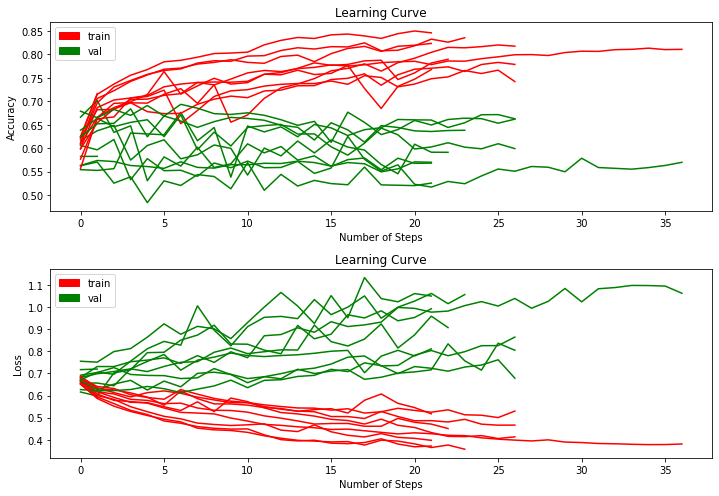

In [3]:
cnn_histories = [load(x) for x in
                     [sorted([path for path in history_paths if f"_lstm_{num_fold}" in str(path)])[-1] for num_fold in range(1,11)]]

assert len(cnn_histories) == 10
for hist in cnn_histories:
    try:
        del hist.history["lr"]
    except KeyError:
        pass
cnn_histories = [hist.history for hist in cnn_histories]

plot_learning_curve_from_keras_histories(histories=cnn_histories)

del cnn_histories

lstm


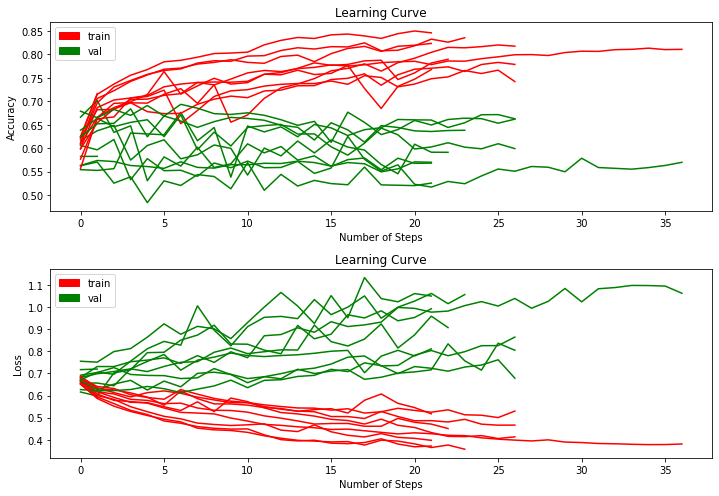

In [4]:
lstm_histories = [load(x) for x in
                     [sorted([path for path in history_paths if f"_lstm_{num_fold}" in str(path)])[-1] for num_fold in range(1,11)]]

assert len(lstm_histories) == 10
for hist in lstm_histories:
    try:
        del hist.history["lr"]
    except KeyError:
        pass
lstm_histories = [hist.history for hist in lstm_histories]

plot_learning_curve_from_keras_histories(histories=lstm_histories)

del lstm_histories


Bi-LSTM

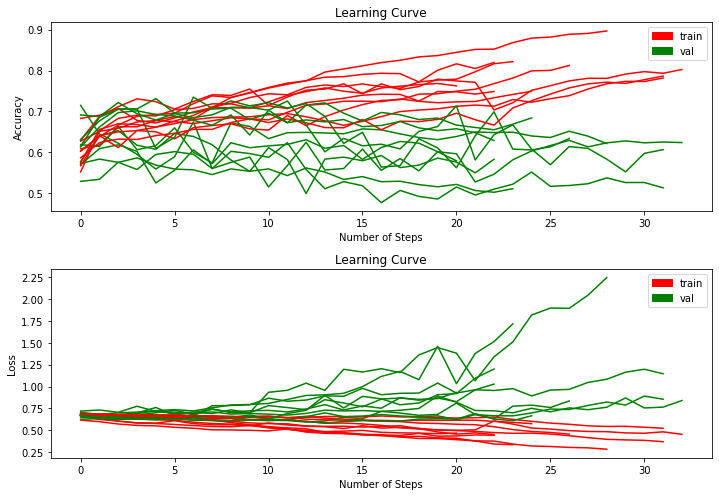

In [5]:
bi_lstm_histories = [load(x) for x in
                     [sorted([path for path in history_paths if f"bi-lstm_{num_fold}" in str(path)])[-1] for num_fold in range(1,11)]]
for hist in bi_lstm_histories:
    try:
        del hist.history["lr"]
    except KeyError:
        pass
bi_lstm_histories = [hist.history for hist in bi_lstm_histories]
assert len(bi_lstm_histories) == 10

plot_learning_curve_from_keras_histories(histories=bi_lstm_histories)

del bi_lstm_histories


merge histories and plot learning curve from merged histories.
Problem: each individual model training for different number of epochs due to early stopping. Therefore only min(epochs_of_all_models) values are merged.

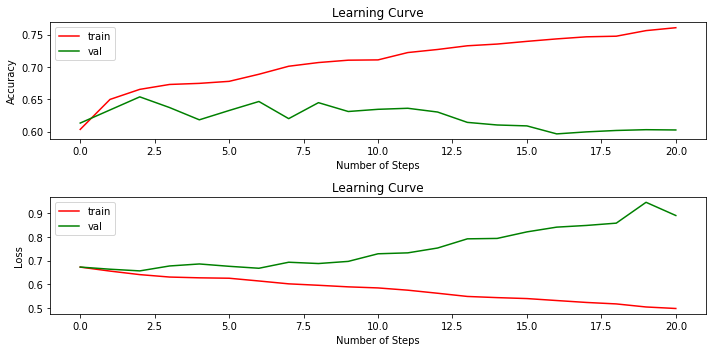

In [6]:
bi_lstm_histories = [load(x) for x in
                     [sorted([path for path in history_paths if f"bi-lstm_{num_fold}" in str(path)])[-1] for num_fold in range(1,11)]]
for hist in bi_lstm_histories:
    try:
        del hist.history["lr"]
    except KeyError:
        pass
bi_lstm_histories = [hist.history for hist in bi_lstm_histories]
assert len(bi_lstm_histories) == 10

merged_hist = dict()
for key in bi_lstm_histories[0].keys():
    vals = [hist[key] for hist in bi_lstm_histories]
    summed = [sum(x) for x in zip(*vals)]
    average = np.divide(summed, len(vals))
    merged_hist[key] = average.tolist()

plt.rcParams["figure.figsize"] = 10,5
plot_learning_curve_from_keras_history(merged_hist)

del bi_lstm_histories
